In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

import imageio
from io import BytesIO

import warnings
warnings.filterwarnings("ignore")

# Experiment 1 Plot

In [51]:
# "NoSystolicResultsExperiment1
FILE = 'SystolicResultsExperiment1.csv'
dfr1 = pd.read_csv('Data/'+FILE)

dfr1

,fold_id,model_name,set,accuracy,precision,recall,f1,auc
0,0,BernoulliNB,train,0.911647,0.891892,0.908257,0.900000,0.938532
1,0,BernoulliNB,test,0.912000,0.857143,0.913043,0.884211,0.910980
2,1,BernoulliNB,train,0.931727,0.910000,0.919192,0.914573,0.931987
3,1,BernoulliNB,test,0.896000,0.877193,0.892857,0.884956,0.921325
4,2,BernoulliNB,train,0.908000,0.876190,0.901961,0.888889,0.922198
...,...,...,...,...,...,...,...,...
1831,99,MLP,test,0.944000,0.927273,0.944444,0.935780,0.976004
1832,100,MLP,train,0.943775,0.923077,0.941176,0.932039,0.957916
1833,100,MLP,test,0.912000,0.903846,0.886792,0.895238,0.919811
1834,101,MLP,train,0.936000,0.941748,0.906542,0.923810,0.968662


In [52]:
dfplot = (dfr1
                .reindex(['fold_id', 'model_name', 'set', 'recall'], axis=1)
                .assign( case = dfr1.model_name + '_' + dfr1.set )
                )
dfplot

,fold_id,model_name,set,recall,case
0,0,BernoulliNB,train,0.908257,BernoulliNB_train
1,0,BernoulliNB,test,0.913043,BernoulliNB_test
2,1,BernoulliNB,train,0.919192,BernoulliNB_train
3,1,BernoulliNB,test,0.892857,BernoulliNB_test
4,2,BernoulliNB,train,0.901961,BernoulliNB_train
...,...,...,...,...,...
1831,99,MLP,test,0.944444,MLP_test
1832,100,MLP,train,0.941176,MLP_train
1833,100,MLP,test,0.886792,MLP_test
1834,101,MLP,train,0.906542,MLP_train


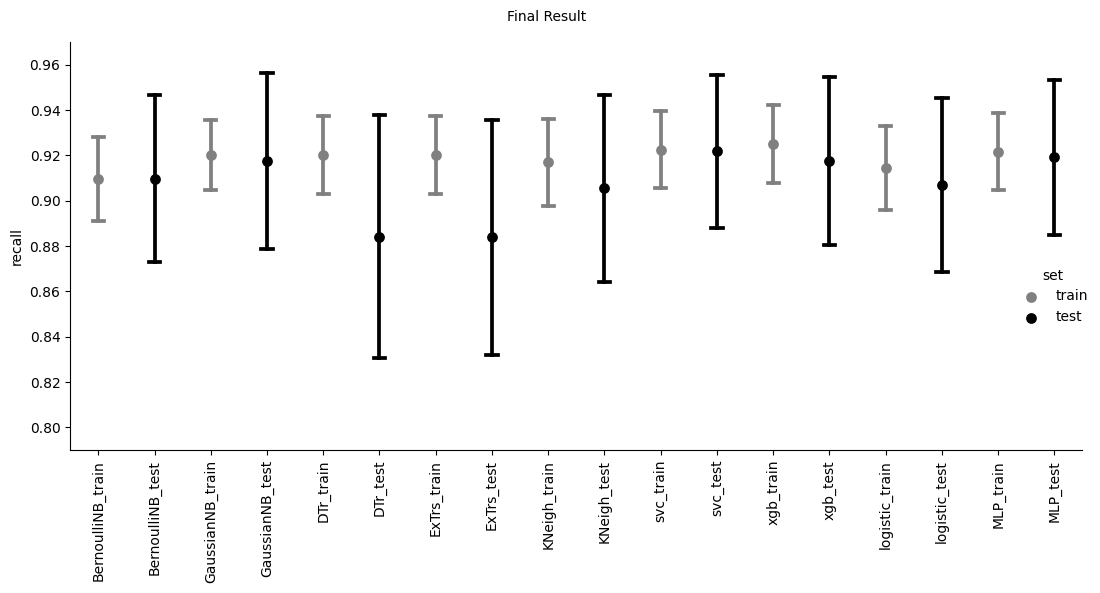

In [53]:
g = sns.catplot(
                data=dfplot, x="case", y="recall", hue="set",
                capsize=.2, palette=['gray', 'black'], errorbar="sd",
                kind="point", height=6, aspect=1.7,
                scale=0.88 # adjust this value to control the size of the points
            )

# Rotate the x-axis labels
g.set_xticklabels(rotation=90)

# Remove the x-axis label
g.set_axis_labels(x_var="", y_var="recall")

# Set y-axis limits
g.set(ylim=(.79, .97))

# Add a title
g.fig.suptitle(f'Final Result', fontsize=10)

# Adjust layout
g.despine()
plt.tight_layout()

g.fig.savefig("images/plots/FinalResult_exp1.png", dpi=300)

## Animation

In [54]:
# List to store the in-memory images
images = []

# Loop through the folds to filter
for fold in list(range(0, 101, 2)):

    # Create range
    _range = list(range(fold+1))
    
    # Plot the points accordingly
    g = sns.catplot(
        data=dfplot[dfplot["fold_id"].isin(_range)], x="case", y="recall", hue="set",
        palette=['gray', 'black'], errorbar="se",
        kind="strip", height=6, aspect=1.7
    )

    # Rotate the x-axis labels
    g.set_xticklabels(rotation=90)

    # Remove the x-axis label
    g.set_axis_labels(x_var="", y_var="recall")

    # Set y-axis limits
    g.set(ylim=(.7, 1.01))

    # Add a title
    g.fig.suptitle(f'Folds <= {str(fold+1)}', fontsize=10)

    # Adjust layout
    g.despine()
    plt.tight_layout()
    
    # Save the plot to a BytesIO object (in-memory binary stream)
    buf = BytesIO()
    g.fig.savefig(buf, format="png")
    buf.seek(0)  # reset the position to the beginning of the stream
    images.append(imageio.imread(buf))
    
    # Close the plot to free up memory
    plt.close()


In [55]:
# Create the GIF directly in memory
imageio.mimsave('images/plots/animated_plot1.gif', images, duration=2, loop=0)

# Experiment 2 Plot

In [78]:
FILE = 'SystolicResultsFinalExperiment.csv'
dfr1 = pd.read_csv('Data/'+FILE)

dfr1

,fold_id,model_name,set,accuracy,precision,recall,f1
0,0,GaussianNB,train,0.923695,0.901786,0.926606,0.914027
1,0,GaussianNB,test,0.912000,0.857143,0.913043,0.884211
2,1,GaussianNB,train,0.923695,0.892157,0.919192,0.905473
3,1,GaussianNB,test,0.904000,0.892857,0.892857,0.892857
4,2,GaussianNB,train,0.912000,0.877358,0.911765,0.894231
...,...,...,...,...,...,...,...
3595,297,hard_vote,test,0.920000,0.893617,0.893617,0.893617
3596,298,hard_vote,train,0.935743,0.920792,0.920792,0.920792
3597,298,hard_vote,test,0.904000,0.862069,0.925926,0.892857
3598,299,hard_vote,train,0.932000,0.920000,0.910891,0.915423


In [79]:
dfplot = (dfr1
                .reindex(['fold_id', 'model_name', 'set', 'recall'], axis=1)
                .assign( case = dfr1.model_name + '_' + dfr1.set )
                )
dfplot

,fold_id,model_name,set,recall,case
0,0,GaussianNB,train,0.926606,GaussianNB_train
1,0,GaussianNB,test,0.913043,GaussianNB_test
2,1,GaussianNB,train,0.919192,GaussianNB_train
3,1,GaussianNB,test,0.892857,GaussianNB_test
4,2,GaussianNB,train,0.911765,GaussianNB_train
...,...,...,...,...,...
3595,297,hard_vote,test,0.893617,hard_vote_test
3596,298,hard_vote,train,0.920792,hard_vote_train
3597,298,hard_vote,test,0.925926,hard_vote_test
3598,299,hard_vote,train,0.910891,hard_vote_train


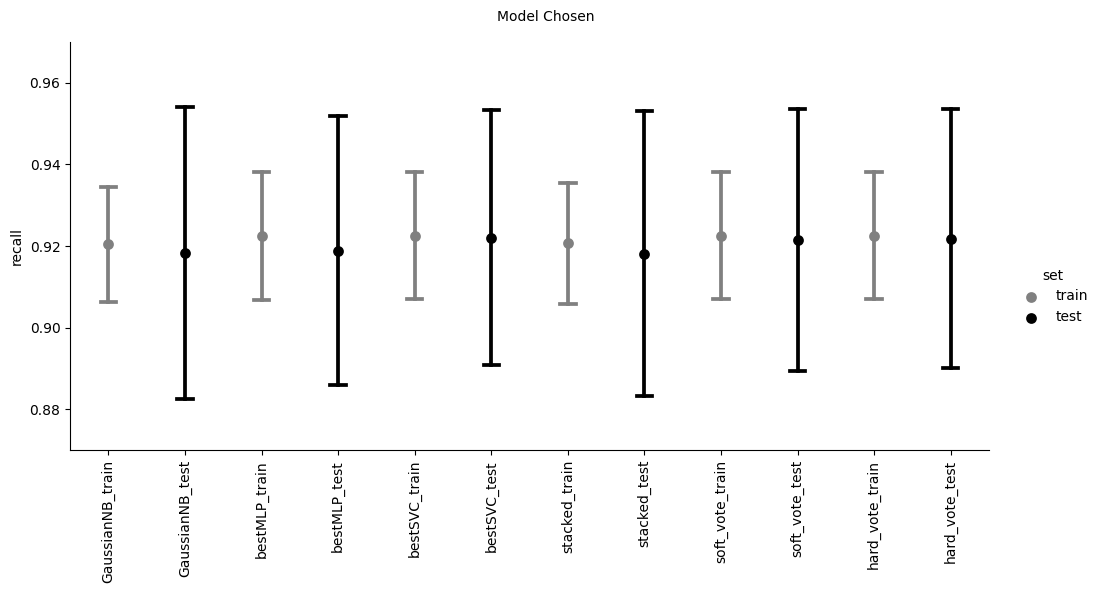

In [82]:
g = sns.catplot(
                data=dfplot, x="case", y="recall", hue="set",
                capsize=.2, palette=['gray', 'black'], errorbar="sd",
                kind="point", height=6, aspect=1.7,
                scale=0.88 # adjust this value to control the size of the points
            )

# Rotate the x-axis labels
g.set_xticklabels(rotation=90)

# Remove the x-axis label
g.set_axis_labels(x_var="", y_var="recall")

# Set y-axis limits
g.set(ylim=(.87, .97))

# Add a title
g.fig.suptitle(f'Model Chosen', fontsize=10)

#g.Legend(loc='upper left',bbox_to_anchor=(1,0.5))
#g.move_legend(loc="upper right", bbox_to_anchor=(1, 1))

# Adjust layout
g.despine()
g.tight_layout()

#g.fig.savefig("images/plots/FinalResult_exp2.png", dpi=300)